# MODELO DE CLASIFICACIÓN DE IMAGENES PARA DETERMINAR NEUMONIA EN PACIENTES CON COVID 19 USANDO REDES NEURONALES CONVOLUCIONALES

## DATASET  [KAGGLE](https://www.kaggle.com/datasets/khoongweihao/covid19-xray-dataset-train-test-sets/data)


##  LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PATH DE IMAGENES

In [ ]:
import os
BASE_DIR = '/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALIDATION_DIR = os.path.join(BASE_DIR,'validation')
TEST_DIR = os.path.join(BASE_DIR,'test')
print(TRAIN_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/train
/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/validation
/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/test


In [ ]:
train_normal_dir = os.path.join(TRAIN_DIR, 'NORMAL')
train_pneumonia_dir = os.path.join(TRAIN_DIR, 'PNEUMONIA')

validation_normal_dir = os.path.join(VALIDATION_DIR, 'NORMAL')
validation_pneumonia_dir = os.path.join(VALIDATION_DIR, 'PNEUMONIA')

test_normal_dir = os.path.join(TEST_DIR, 'NORMAL')
test_pneumonia_dir = os.path.join(TEST_DIR, 'PNEUMONIA')

print(train_normal_dir)
print(train_pneumonia_dir)
print(validation_normal_dir)
print(validation_pneumonia_dir)
print(test_normal_dir)
print(test_pneumonia_dir)

/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/train/NORMAL
/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/train/PNEUMONIA
/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/validation/NORMAL
/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/validation/PNEUMONIA
/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/test/NORMAL
/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/test/PNEUMONIA


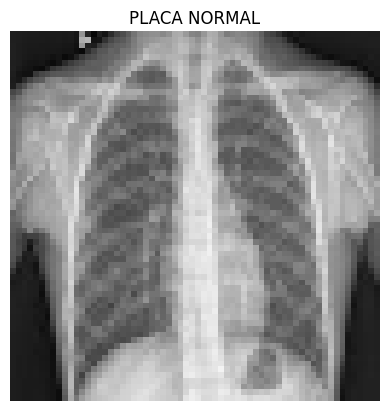

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img(f'{train_normal_dir}/IM-0001-0001.jpeg',target_size=(64,64))
plt.imshow(img)
plt.title('PLACA NORMAL')
plt.axis('off')
plt.show()

# Cantidad de archivos hay en cada carpeta

In [ ]:
dataset_dir = [train_normal_dir,train_pneumonia_dir,validation_normal_dir,validation_pneumonia_dir,test_normal_dir,test_pneumonia_dir]
for img_dir in dataset_dir:
  print(f" en directorio :{img_dir} hay {len(os.listdir(img_dir))} imagenes")

 en directorio :/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/train/NORMAL hay 74 imagenes
 en directorio :/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/train/PNEUMONIA hay 74 imagenes
 en directorio :/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/validation/NORMAL hay 10 imagenes
 en directorio :/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/validation/PNEUMONIA hay 10 imagenes
 en directorio :/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/test/NORMAL hay 10 imagenes
 en directorio :/content/drive/MyDrive/Colab Notebooks/MODULO 6/dataset/test/PNEUMONIA hay 10 imagenes


#  VALIDACIÓN Y PRUEBAS

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


#  DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1. /255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
val_data = ImageDataGenerator(rescale=1. /255)
test_data = ImageDataGenerator(rescale=1. /255)

##  CONJUNTOS DE DATOS CON LOS OBJETOS CREADOS

In [ ]:
training_set = train_data.flow_from_directory(
    TRAIN_DIR,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)
validation_set = train_data.flow_from_directory(
    VALIDATION_DIR,
    target_size=(64,64),
    batch_size=20,
    class_mode='binary'
)
test_set = train_data.flow_from_directory(
    TEST_DIR,
    target_size=(64,64),
    class_mode='binary'
)

Found 148 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


#  RED NEURONAL CONVOLUCIONAL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

modelo = Sequential()
modelo.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Conv2D(32,(3,3),activation='relu'))
modelo.add(MaxPooling2D((2,2)))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(1,activation='sigmoid'))

modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelo.compile(loss="binary_crossentropy",
               optimizer='adam',
               metrics=['accuracy'])

# ENTRENAMIENTO

In [ ]:
history = modelo.fit(training_set,epochs=10,batch_size=100,validation_data=validation_set)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 10s/step - accuracy: 0.4884 - loss: 0.7175 - val_accuracy: 0.5500 - val_loss: 0.6751
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.6092 - loss: 0.6704 - val_accuracy: 0.9500 - val_loss: 0.6303
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.6119 - loss: 0.6468 - val_accuracy: 0.9000 - val_loss: 0.5737
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.6794 - loss: 0.6383 - val_accuracy: 0.9000 - val_loss: 0.5012
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.7343 - loss: 0.5868 - val_accuracy: 0.9500 - val_loss: 0.4037
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6676 - loss: 0.6026 - val_accuracy: 0.7000 - val_loss: 0.5000
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.6418 - loss: 0.6501 - val_accuracy: 0.9500 - val_loss: 0.4351
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.7654 - loss: 0.5132 - val_accuracy: 0.9500 - val_loss: 

# EVALUACION

In [ ]:
evaluacion = modelo.evaluate(test_set)
print(evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9500 - loss: 0.1862
[0.1861688643693924, 0.949999988079071]


#  PREDICCIÓN DEL MODELO

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
predicción :  [[1.]]
tiene pneumonia


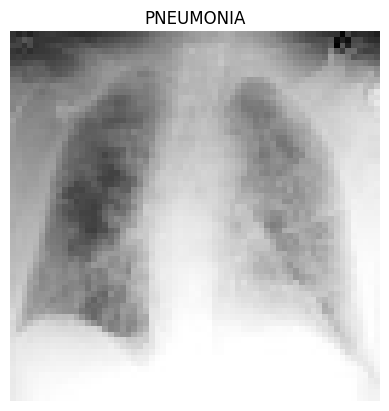

In [ ]:
from keras.preprocessing import image
normal = image.load_img(test_normal_dir + "/NORMAL2-IM-0035-0001.jpeg",target_size=(64,64))
pneumonia = image.load_img(test_pneumonia_dir + "/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg",target_size=(64,64))
imagen_prueba = pneumonia

test_image = image.img_to_array(imagen_prueba)
test_image = np.expand_dims(test_image,axis=0)
training_set.class_indices


result = modelo.predict(test_image)
print("predicción : ",result)
if result[0][0] == 0:
  print("es normal")
  plt.imshow(imagen_prueba)
  plt.title('Normal')
  plt.axis('off')
  plt.show()
else:
  print("tiene pneumonia")
  plt.imshow(imagen_prueba)
  plt.title('PNEUMONIA')
  plt.axis('off')
  plt.show()

# GRAFICO ACCURACY Y LOSS

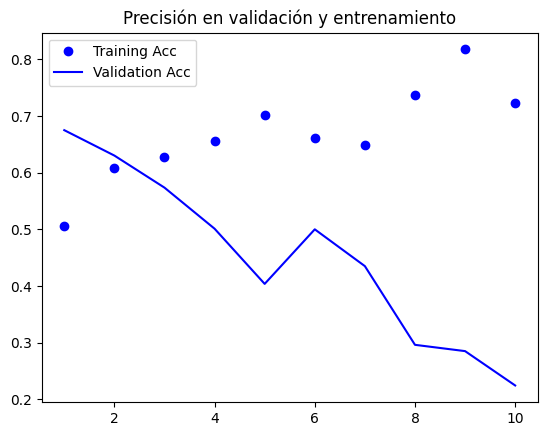

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('Precisión en validación y entrenamiento')
plt.legend()
plt.show()

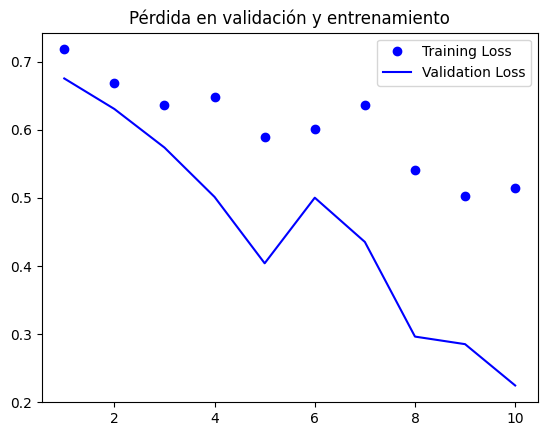

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Pérdida en validación y entrenamiento')
plt.legend()
plt.show()